In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6, 4)
plt.style.use('fivethirtyeight')

In [ ]:
df_reviews = pd.read_csv('/content/drive/MyDrive/Capstone Project (Books Reviews)/Data/goodreads_review_spoiler.csv')

In [ ]:
df_reviews.head()

,review_id,user_id,book_id,timestamp,rating,has_spoiler,review_sentences
0,dfdbb7b0eb5a7e4c26d59a937e2e5feb,8842281e1d1347389f2ab93d60773d4d,18245960,2017-08-30,5.0,1.0,"[[0, 'This is a special book.'], [0, 'It start..."
1,a5d2c3628987712d0e05c4f90798eb67,8842281e1d1347389f2ab93d60773d4d,16981,2017-03-22,3.0,0.0,"[[0, 'Recommended by Don Katz.'], [0, 'Avail f..."
2,2ede853b14dc4583f96cf5d120af636f,8842281e1d1347389f2ab93d60773d4d,28684704,2017-03-20,3.0,1.0,"[[0, 'A fun, fast paced science fiction thrill..."
3,ced5675e55cd9d38a524743f5c40996e,8842281e1d1347389f2ab93d60773d4d,27161156,2016-11-09,0.0,0.0,"[[0, 'Recommended reading to understand what i..."
4,332732725863131279a8e345b63ac33e,8842281e1d1347389f2ab93d60773d4d,25884323,2016-04-25,4.0,1.0,"[[0, 'I really enjoyed this book, and there is..."


In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378033 entries, 0 to 1378032
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   review_id         1378033 non-null  object 
 1   user_id           1378033 non-null  object 
 2   book_id           1378033 non-null  int64  
 3   timestamp         1378033 non-null  object 
 4   rating            1378033 non-null  float64
 5   has_spoiler       1378033 non-null  float64
 6   review_sentences  1378033 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 73.6+ MB


In [ ]:
df_reviews['review_id'].is_unique

True

In [ ]:
df_reviews.drop('review_id', axis=1, inplace=True)

In [ ]:
df_reviews['timestamp'] = pd.to_datetime(df_reviews['timestamp'])
df_reviews['rating'] = pd.to_numeric(df_reviews['rating'], downcast ='integer')
df_reviews['has_spoiler'] = pd.to_numeric(df_reviews['has_spoiler'], downcast ='integer')

In [ ]:
df_reviews['review_sentences'] = df_reviews['review_sentences'].apply(lambda x: eval(x))

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378033 entries, 0 to 1378032
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   user_id           1378033 non-null  object        
 1   book_id           1378033 non-null  int64         
 2   timestamp         1378033 non-null  datetime64[ns]
 3   rating            1378033 non-null  int8          
 4   has_spoiler       1378033 non-null  int8          
 5   review_sentences  1378033 non-null  object        
dtypes: datetime64[ns](1), int64(1), int8(2), object(2)
memory usage: 44.7+ MB


# Exploratory Data Analysis (EDA)

## Univariate Analysis

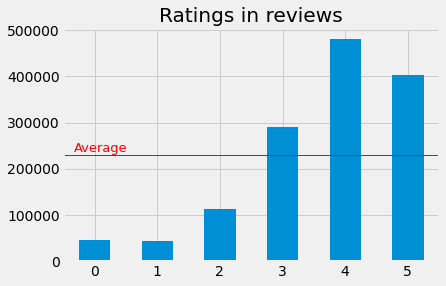

In [ ]:
df_reviews['rating'].value_counts().sort_index().plot.bar()
plt.title('Ratings in reviews')
plt.xticks(rotation = 'horizontal')
plt.axhline(y=df_reviews['rating'].value_counts().mean(),linewidth=1, color='red')
plt.text(0.1, df_reviews['rating'].value_counts().mean()+15000, 'Average', fontsize=13, va='center', ha='center', color = 'red')
plt.show()

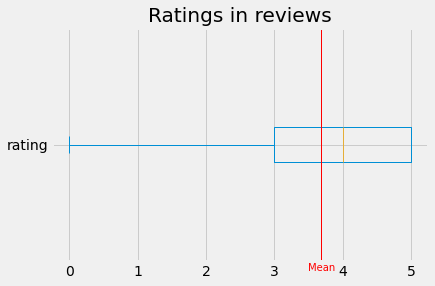

In [ ]:
df_reviews['rating'].plot.box(vert=False)
plt.title('Ratings in reviews')
plt.axvline(x=df_reviews['rating'].mean(),linewidth=1, color='red')
plt.text(df_reviews['rating'].mean(),0.47, 'Mean', fontsize=10, va='center', ha='center', color = 'red')
plt.show()

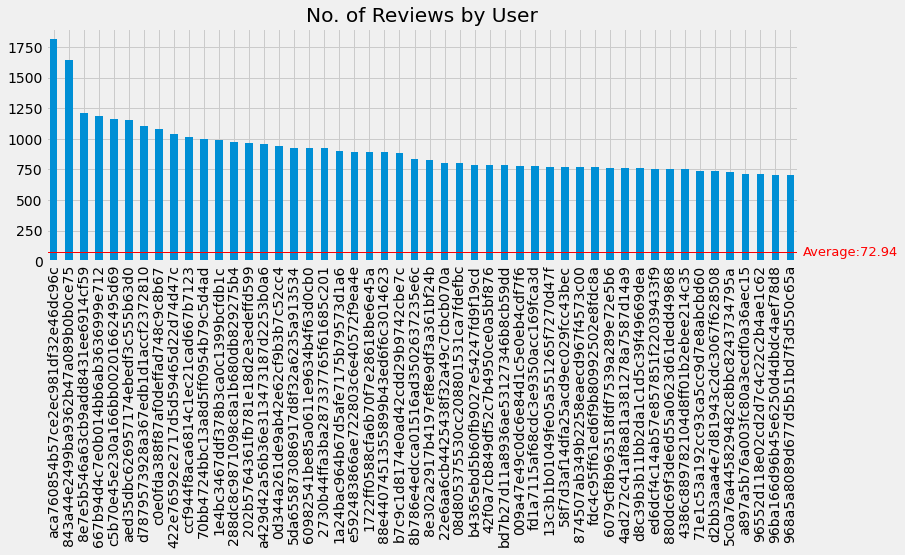

In [ ]:
plt.figure(figsize=(12, 4))
df_reviews['user_id'].value_counts().sort_values(ascending=False)[:50].plot.bar()
plt.title('No. of Reviews by User')
plt.axhline(y=df_reviews['user_id'].value_counts().mean(),linewidth=1, color='red')
plt.text(53, df_reviews['user_id'].value_counts().mean(), 'Average:'+ str(round(df_reviews['user_id'].value_counts().mean(),2)), fontsize=13, va='center', ha='center', color = 'red')
plt.show()

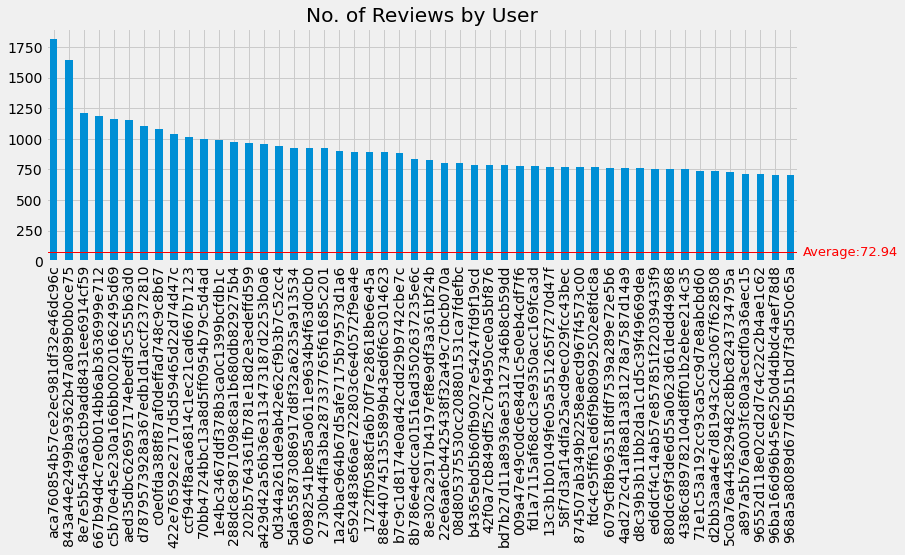

In [ ]:
plt.figure(figsize=(12, 4))
df_reviews['user_id'].value_counts().sort_values(ascending=False)[:50].plot.bar()
plt.title('No. of Reviews by User')
plt.axhline(y=df_reviews['user_id'].value_counts().mean(),linewidth=1, color='red')
plt.text(53, df_reviews['user_id'].value_counts().mean(), 'Average:'+ str(round(df_reviews['user_id'].value_counts().mean(),2)), fontsize=13, va='center', ha='center', color = 'red')
plt.show()

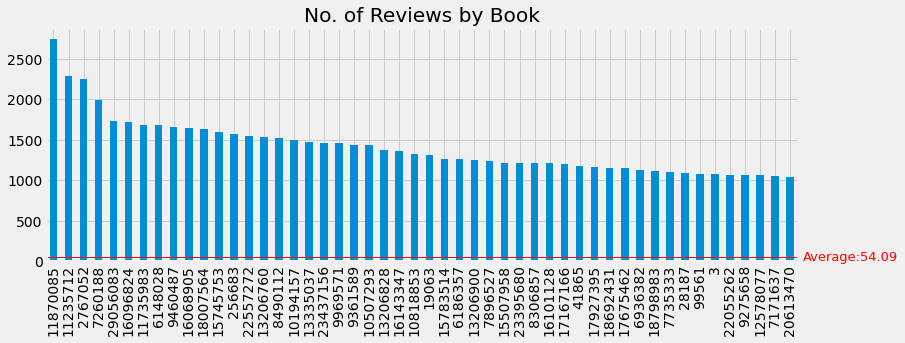

In [ ]:
plt.figure(figsize=(12, 4))
df_reviews['book_id'].value_counts().sort_values(ascending=False)[:50].plot.bar()
plt.title('No. of Reviews by Book')
plt.axhline(y=df_reviews['book_id'].value_counts().mean(),linewidth=1, color='red')
plt.text(53, df_reviews['book_id'].value_counts().mean(), 'Average:' + str(round(df_reviews['book_id'].value_counts().mean(),2)), fontsize=13, va='center', ha='center', color = 'red')
plt.show()

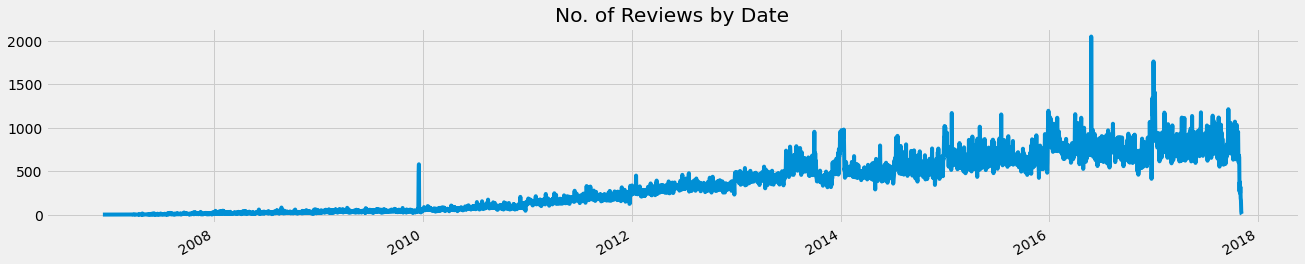

In [ ]:
plt.figure(figsize=(20, 4))
df_reviews['timestamp'].value_counts().sort_index().plot.line()
plt.title('No. of Reviews by Date')

plt.show()

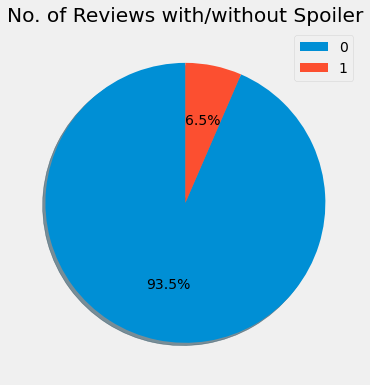

In [ ]:
plt.figure(figsize=(12, 6))
df_reviews['has_spoiler'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, startangle=90, shadow=True)
#plt.axis('equal')
plt.title('No. of Reviews with/without Spoiler')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc="upper right", labels = [0,1])
plt.show()

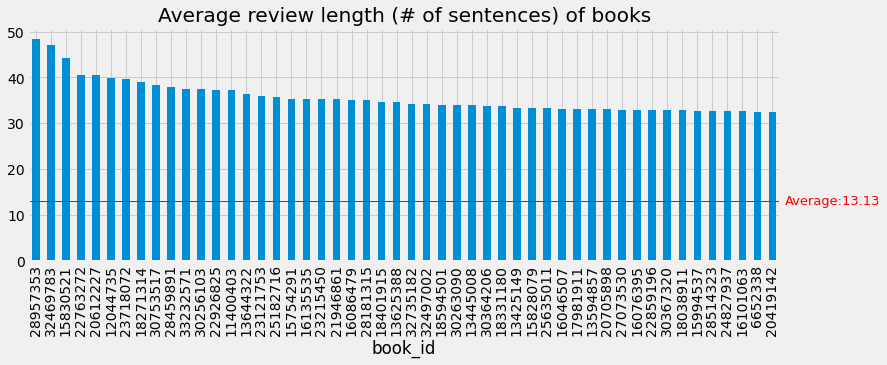

In [ ]:
df_reviews['review_length'] = df_reviews['review_sentences'].apply(lambda x : len(x))

plt.figure(figsize=(12, 4))
df_reviews.groupby('book_id')['review_length'].mean().sort_values(ascending=False)[:50].plot.bar()
plt.title('Average review length (# of sentences) of books')
plt.axhline(y=df_reviews.groupby('book_id')['review_length'].mean().mean(),linewidth=1, color='red')
plt.text(53, df_reviews.groupby('book_id')['review_length'].mean().mean(), 'Average:'+ str(round(df_reviews.groupby('book_id')['review_length'].mean().mean(),2)), fontsize=13, va='center', ha='center', color = 'red')
plt.show()



1.   The ratings are skewed to the right (generally high ratings) , with the most number of 4.
2.   User IDs 'aca760854b57ce2ec981df32e46dc96c', '843a44e2499ba9362b47a089b0b0ce75' and '8e7e5b546a63cb9add8431ee6914cf59' have given the most numbers of reviews (1815, 1647 and 1214).
3.  Book IDs '11870085', '11235712' and '2767052' have received the most numbers of reviews (2745, 2289, 2245).
4.  The dataset includes reviews from 2008 to 2018 and number of reviews shows an uptrend across years.
5.  Most of the reviews (93.5%) have no spoiler in them. 
6. Books ID '28957353', '32469783' and '15830521' have the longest average lengths of reviews.(48.466667, 47.000000 and 44.153846)

## Bivariate Analysis


*   average ratings by book
*   average ratings by user
*   spoiler vs ratings
*   what movie/users has spoiler?

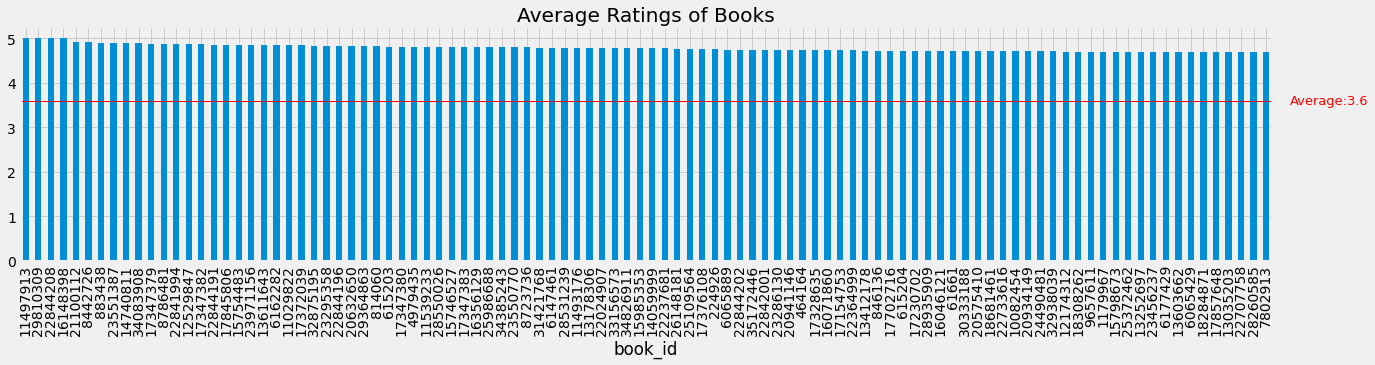

In [ ]:
plt.figure(figsize=(20, 4))
df_reviews.groupby('book_id')['rating'].mean().sort_values(ascending=False)[:100].plot.bar()

plt.title('Average Ratings of Books')
plt.axhline(y=df_reviews.groupby('book_id')['rating'].mean().sort_values(ascending=False).mean(),linewidth=1, color='red')
plt.text(104, df_reviews.groupby('book_id')['rating'].mean().sort_values(ascending=False).mean(), 'Average:'+ str(round(df_reviews.groupby('book_id')['rating'].mean().sort_values(ascending=False).mean(),2)), fontsize=13, va='center', ha='center', color = 'red')
plt.show()

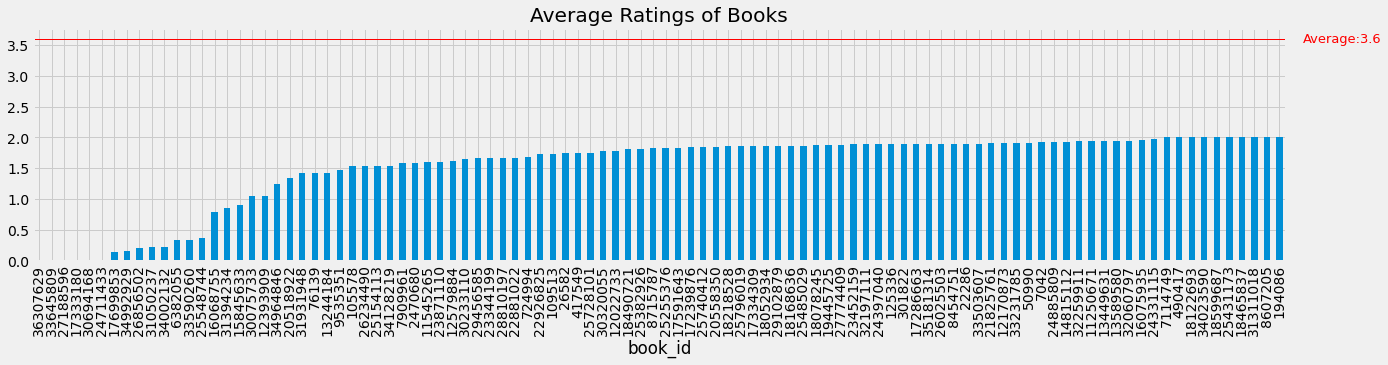

In [ ]:
plt.figure(figsize=(20, 4))
df_reviews.groupby('book_id')['rating'].mean().sort_values(ascending=True)[:100].plot.bar()


plt.title('Average Ratings of Books')
plt.axhline(y=df_reviews.groupby('book_id')['rating'].mean().sort_values(ascending=True).mean(),linewidth=1, color='red')
plt.text(104, df_reviews.groupby('book_id')['rating'].mean().sort_values(ascending=True).mean(), 'Average:'+ str(round(df_reviews.groupby('book_id')['rating'].mean().sort_values(ascending=True).mean(),2)), fontsize=13, va='center', ha='center', color = 'red')
plt.show()

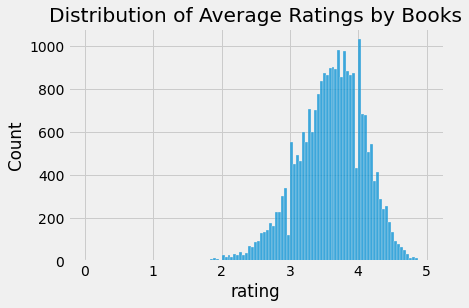

In [ ]:
sns.histplot(x = df_reviews.groupby('book_id')['rating'].mean())
plt.title('Distribution of Average Ratings by Books')
plt.show()

*  Book IDs '11497913', '29810309', '22844208' and '16148398" have average rating of 5. (all ratings are 5)
*  Besides the 5-rating books, '21100112', '8442726' and '883438' have the highest average rating. (4.916667, 4.916667, 4.90000)

*  '36307629', '33645809', '27188596', '17333180', '30694168', '24711433' have ratings of 0. (all ratings are 0)
* Besides the 0-rating books, the books with lowest ratings are '17699853' , '34992929' and  '26856502' (0.138889, 0.166667 and 0.208333)

*  Most of the books have avearge rating of 3 to 4.
 

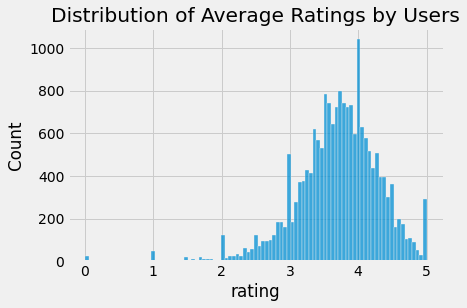

In [ ]:
sns.histplot(x = df_reviews.groupby('user_id')['rating'].mean())
plt.title('Distribution of Average Ratings by Users')
plt.show()

In [ ]:
pd.DataFrame(df_reviews.groupby('user_id')['rating'].mean())[pd.DataFrame(df_reviews.groupby('user_id')['rating'].mean())['rating'] == 5]

,rating
user_id,
0016a8010771c0c00c97f27dfc5cdd22,5.0
00fe0b0e23a347b90fe0fcd5ea03351c,5.0
0153fc6c1544418a2dc6e27155451de2,5.0
04135f0645ba63f4b47f978d07c82758,5.0
045baf8150d4144f7af4b000ae587e61,5.0
...,...
fdbf757907aab19864380f85b67175b5,5.0
fdee5b4c871f0a18d5d37c94242d21d5,5.0
fdfaa1eeddeb558af311d36eaac263d8,5.0


In [ ]:
pd.DataFrame(df_reviews.groupby('user_id')['rating'].mean())[pd.DataFrame(df_reviews.groupby('user_id')['rating'].mean())['rating'] == 0]

,rating
user_id,
004bbbceeaf006d1d4ff5ed3c3fca31a,0.0
0844ce8e7c61bc32f551fef753fcd41d,0.0
0f88a28fbec16fe96d4ecdf584bbdfb3,0.0
11f5af0f11e1b73863c7a887ef0f2d37,0.0
1880bc7b16794075b70b07865a38364e,0.0
26ef3c4fe7b27f19a2b7f9e1c70bc80c,0.0
2792e28c0cdf9b163fb617811333aac3,0.0
312dfb38523ba71e0abcbe0276c9c644,0.0
35b90e73f0cf77757b9caac7b6450474,0.0


*  286 users only gave rating of 5. They write reviews only to books they like a lot.

*  25 users only gave rating of 0. They write reviews only to books they hate a lot but not to those they like.

*  People (at least users in the dataset) are more likely to write reviews/ give ratings to books they like than that they dislike.



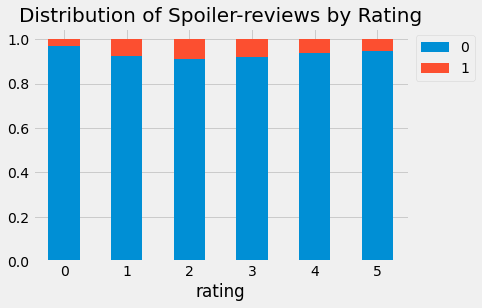

In [ ]:
pd.crosstab(df_reviews['rating'],df_reviews['has_spoiler'], normalize='index').plot.bar(stacked=True)
plt.title('Distribution of Spoiler-reviews by Rating', fontsize= 20)
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation = 'horizontal')
plt.show()


*   Moderate ratings (2,3) are more likely to have spoiler in reviews than (0,1) and (4,5).
*   Reviews of 0-rating is very unlikely to have spoiler.



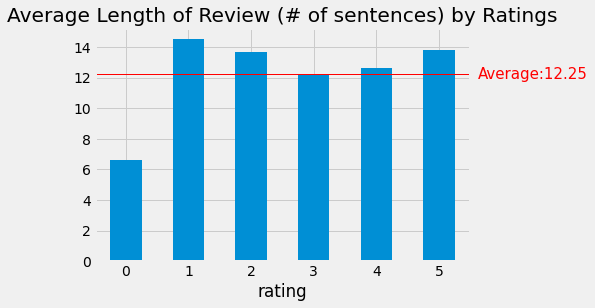

In [ ]:
df_reviews.groupby('rating')['review_length'].mean().plot.bar()

plt.title('Average Length of Review (# of sentences) by Ratings')
plt.axhline(y=df_reviews.groupby('rating')['review_length'].mean().mean(),linewidth=1, color='red')
plt.text(6.5, df_reviews.groupby('rating')['review_length'].mean().mean(), 'Average:'+ str(round(df_reviews.groupby('rating')['review_length'].mean().mean(),2)), fontsize=15, va='center', ha='center', color = 'red')
plt.xticks(rotation = 'horizontal')
plt.show()

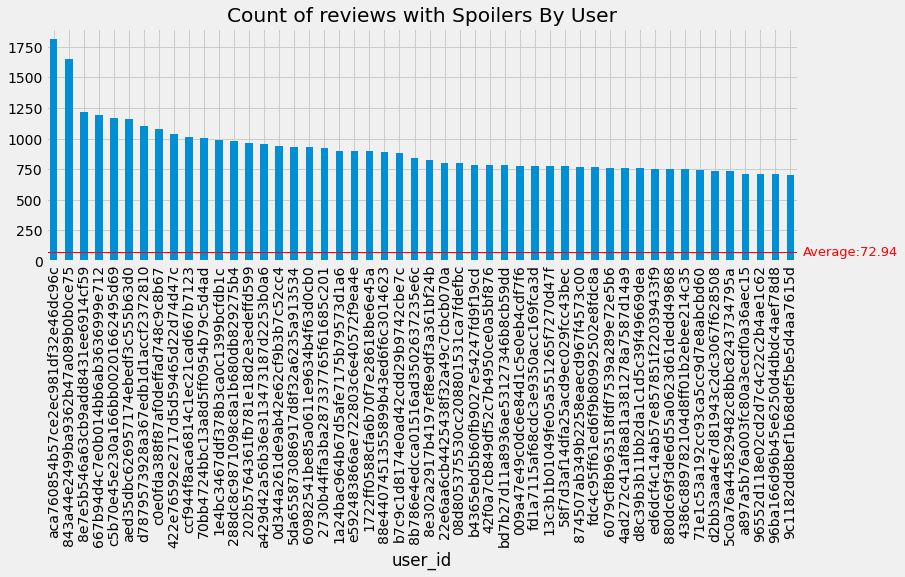

In [ ]:
plt.figure(figsize=(12, 4))
df_reviews.groupby('user_id')['has_spoiler'].count().sort_values(ascending=False)[:50].plot.bar()
plt.title('Count of reviews with Spoilers By User')
plt.axhline(y=df_reviews.groupby('user_id')['has_spoiler'].count().mean(),linewidth=1, color='red')
plt.text(53, df_reviews.groupby('user_id')['has_spoiler'].count().mean(), 'Average:'+ str(round(df_reviews.groupby('user_id')['has_spoiler'].count().mean(),2)), fontsize=13, va='center', ha='center', color = 'red')
plt.show()

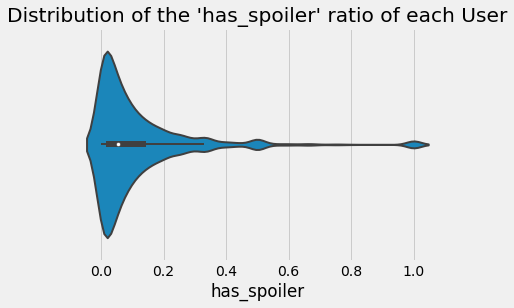

In [ ]:
sns.violinplot(x = df_reviews.groupby('user_id')['has_spoiler'].mean(), linewidth = 2)

plt.title("Distribution of the 'has_spoiler' ratio of each User")

plt.show()

In [ ]:
pd.DataFrame(df_reviews.groupby('user_id')['has_spoiler'].mean())[pd.DataFrame(df_reviews.groupby('user_id')['has_spoiler'].mean())['has_spoiler']==1]

,has_spoiler
user_id,
0016a8010771c0c00c97f27dfc5cdd22,1.0
004bbbceeaf006d1d4ff5ed3c3fca31a,1.0
0097a6d55378739acea08945cf3b7547,1.0
024b16ebb5e05119d95dd403a007abb4,1.0
045baf8150d4144f7af4b000ae587e61,1.0
...,...
fc3983c59acccfd4aa41f1b16c9bc055,1.0
fc56ea1c32a887e281f9d38d0d286709,1.0
fc9f3ed52c430256ba77ad0d80fdb1d7,1.0


In [ ]:
pd.DataFrame(df_reviews.groupby('user_id')['has_spoiler'].mean())[pd.DataFrame(df_reviews.groupby('user_id')['has_spoiler'].mean())['has_spoiler']==0]

,has_spoiler
user_id,
000efb30c5236d7437c3cdf4bf3e4dc7,0.0
0019de4561419b7543238e0979f2f33e,0.0
0040328657fcde605d736534b3b325e6,0.0
004470054c60c8961814f487370cc386,0.0
005a572f0bfe510fa796e6eadc6a2eb4,0.0
...,...
ff9cae1615de3d704257b657589334d8,0.0
ffb72f9c157638ddc3a7c65d4f7a7209,0.0
ffc2099804875896d5961c2ce8209087,0.0


*  User IDs 'aca760854b57ce2ec981df32e46dc96c','843a44e2499ba9362b47a089b0b0ce75' and '8e7e5b546a63cb9add8431ee6914cf59' has given the most nunmbers of reviews of spoiler. And they only write spoiler reviews.
*  There are 280 users who only write reviews with spoilers, 2852 users only wrire reviews without spoiler. 
*  Most people give spoiler reviews rarely. (>20% of all review they write)